In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import pandas as pd
from matplotlib import rcParams

In [2]:
rcParams['font.sans-serif'] = "Arial"

In [3]:
freq = pickle.load(open('extra-inputs/feat_frequencies.pkl', 'rb'))
imp = pickle.load(open('extra-inputs/feat_importances.pkl', 'rb'))
labels = pickle.load(open('extra-inputs/feat_frequencies_labels.pkl', 'rb'))

In [4]:
df = pd.read_excel('extra-inputs/feature_classification.xlsx', header=None, index_col=0)
dic_classes = df.to_dict(orient='index')

In [5]:
v_class1 = []
v_class2 = []
for l in labels: 
    v_class1.append(dic_classes[l][1])
    v_class2.append(dic_classes[l][2])
f_class1 = pd.factorize(v_class1)[0]
f_class2 = pd.factorize(v_class2)[0]

In [6]:
def draw(ftab, itab): 
    
    # Normalize
    ftab = ftab/np.nanmax(ftab)
    itab = itab/np.nanmax(itab)
    
    # Set up figure
    fig = plt.figure(figsize = (2.5,15))
    gs1 = gridspec.GridSpec(1,5,figure=fig)
    gs1.update(wspace=0.25, hspace=0.2) # set the spacing between axes.
            
    ax2 = fig.add_subplot(gs1[0,0])
    ax2.imshow(f_class1.reshape(-1,1), cmap='Reds')
    ax2.set_aspect(0.5)

    
    for modelnum in range(0,4):
        fctab = np.array([ftab[modelnum],np.zeros_like(ftab[modelnum])])
        ictab = np.array([np.zeros_like(itab[modelnum]),itab[modelnum]])
        ictab_masked = np.ma.masked_where(ictab==0, ictab)
        
        ax1 = fig.add_subplot(gs1[0,modelnum+1])
        ax1.imshow(fctab.T, cmap='Blues')
        ax1.imshow(ictab_masked.T, cmap='Greens')
        
        #plt.axis('off')
        ax1.set_yticks(range(len(labels)))
        ax1.set_yticklabels([])
        ax1.set_xticklabels([])

    
    fig.get_axes()[0].set_yticks(range(len(labels)))
    fig.get_axes()[0].set_yticklabels(labels, size=14)
    
    plt.show()

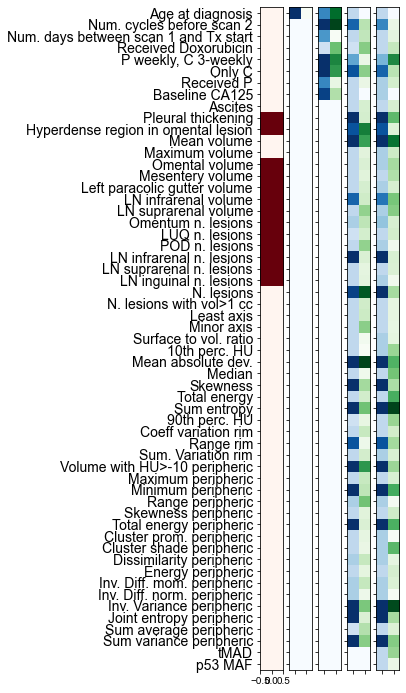

In [7]:
v1 = freq[[0,2,7,8]]
v2 = imp[[0,2,7,8]]
draw(v1, v2)

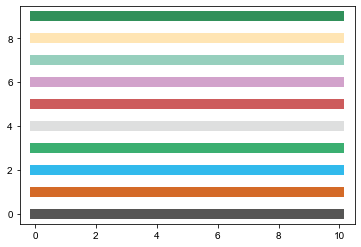

In [8]:
## create colormap
from matplotlib import colors

colorlist = [
    '#565554',
    '#D46A28',
    '#31BAEC',
    '#3BAF71',
    '#DEDFDF',    
    '#CD5B5C',
    '#D2A2CB',
    '#96CFBD',
    '#FFE5B4',
    '#31905A']
cmap = colors.ListedColormap(colorlist)
boundaries = list(range(len(colorlist)+1))

for i,c in enumerate(colorlist): 
    plt.plot([0,10],[i,i],color=c,linewidth=10)
plt.show()

In [9]:
def draw(ftab, itab): 
    outfile = open('data-export/figure_5.txt', 'w')
    # Normalize
    ftab = ftab/np.nanmax(ftab)
    itab = itab/np.nanmax(itab)
    
    # x-axis titles
    models = ['Clinical','+CA-125','+Radiomics','+ctDNA']
    
    # Set up figure
    fig, ax = plt.subplots(1, 4, figsize=(2.5, 15), gridspec_kw={'width_ratios': [1, 1, 4, 4]})
            
    ax[0].imshow(f_class1.reshape(-1,1), cmap='binary')
    ax[0].set_yticks(range(len(labels)))
    ax[0].set_yticklabels(labels, size=12)
    ax[0].set_xticks([])
    
    ax[1].imshow(f_class2.reshape(-1,1), cmap=cmap)
    ax[1].set_yticks([])
    ax[1].set_xticks([])

    ax[2].imshow(ftab.T, cmap='Blues')
    ax[2].set_xticks(range(len(models)))
    ax[2].set_xticklabels(models, size=12, rotation=80)
    ax[2].set_yticks([])

    ax[3].imshow(itab.T, cmap='Greens')
    ax[3].set_xticks(range(len(models)))
    ax[3].set_xticklabels(models, size=12, rotation=80)
    ax[3].set_yticks([])
    
    output_matrix = np.concatenate([np.array(labels).reshape(-1,1), f_class1.reshape(-1,1), f_class2.reshape(-1,1), ftab.T, itab.T], axis=1)
    for line in output_matrix:
        print(line)
        outfile.write('{}'.format(','.join(line)))
    outfile.close()
    
    #plt.savefig('figures/heatmap_importances_summary.pdf', bbox_inches='tight', transparent=True)
    plt.show()

['Age at diagnosis' '0' '0' '1.0' '0.6666666666666666'
 '0.26666666666666666' '0.26666666666666666' '1.0' '0.5999353769719652'
 'nan' 'nan']
['Num. cycles before scan 2' '0' '0' '0.0' '1.0' '0.8'
 '0.6666666666666666' 'nan' '0.6788667887943672' '0.1915691339322814'
 '0.0449485863509923']
['Num. days between scan 1 and Tx start' '0' '0' '0.0' '0.6'
 '0.26666666666666666' '0.26666666666666666' 'nan' '0.056058114709391156'
 '0.17206801951487982' '0.06641295524624041']
['Received Doxorubicin' '0' '0' '0.0' '0.2' '0.2' '0.26666666666666666'
 'nan' '0.37743757143178835' '0.28827453089619554' '0.13083710064962753']
['P weekly, C 3-weekly' '0' '0' '0.0' '1.0' '0.5333333333333333'
 '0.4666666666666667' 'nan' '0.535763472265619' '0.054110855852415506'
 '0.38418735493254386']
['Only C' '0' '0' '0.0' '1.0' '0.8666666666666667' '0.8' 'nan'
 '0.4919807946436487' '0.28064322554331056' '0.14820148692789975']
['Received P' '0' '0' '0.0' '0.6666666666666666' '0.26666666666666666'
 '0.3333333333333333' '

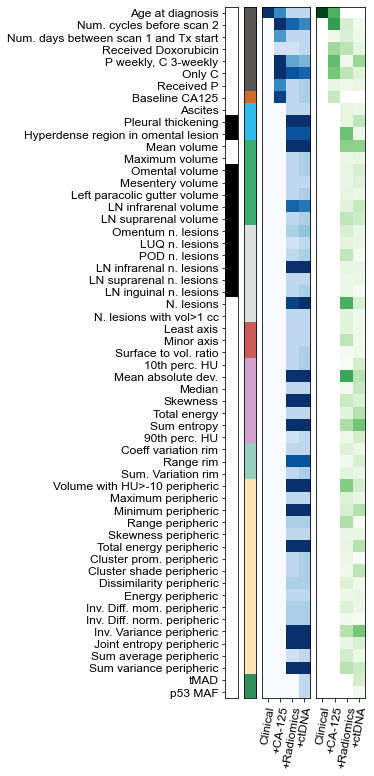

In [10]:
v1 = freq[[0,2,7,8]]
v2 = imp[[0,2,7,8]]
draw(v1, v2)